In [ ]:
# Richardson, TX Weather Trends (2020–2024)

This notebook presents a final summary of key temperature trends in Richardson, Texas over the past 5 years. We use simple yet powerful data analysis to explore:

- Seasonal temperature patterns
- Year-over-year warming or cooling
- Heat range variations
- Changes in extreme temperatures


C:\Users\harvi\AppData\Local\Temp\ipykernel_20148\1679786063.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="coolwarm")


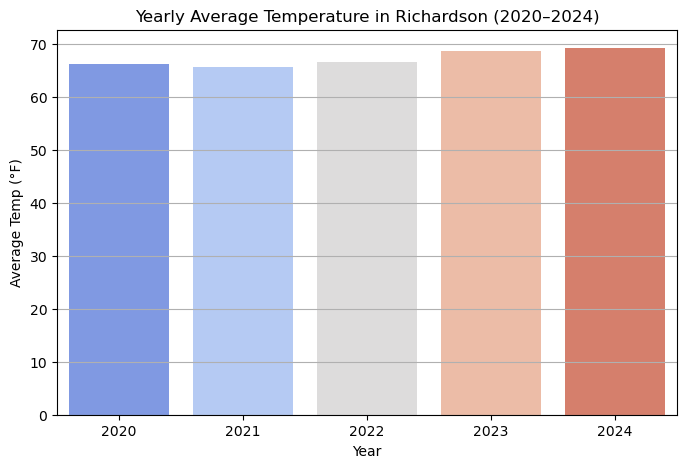

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\harvi\\Desktop\\richardson-weather-analysis\\data\\richardson weather from 1-2020 to 12-2024.csv", parse_dates=['DATE'])
df.set_index('DATE', inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['temp_range'] = df['TMAX'] - df['TMIN']
df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2

yearly_avg = df.groupby('year')['TAVG'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="coolwarm")
plt.title("Yearly Average Temperature in Richardson (2020–2024)")
plt.ylabel("Average Temp (°F)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.show()

In [ ]:
### 📌Insight:
We observe whether Richardson is experiencing gradual warming over the years. This can hint at local climate shifts, heatwave trends, or urban heat effects.
